In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel_1d(x, xi, sigma):
    return np.exp(-((x - xi) ** 2) / (2 * sigma ** 2))

def construct_G_matrix(xi_values, t_values, sigma):
    M = len(xi_values)
    N = len(t_values)
    G = np.zeros((M, N)) 

    for i, xi in enumerate(xi_values):
        for j, tj in enumerate(t_values):
            G[i, j] = gaussian_kernel_1d(xi, tj, sigma)  # g(xi - t)
    
    return G

# Set parameters
M = 500  # ξ_m
N = 100  # t_n
sigma = 10

# Generate xi and t values
xi_values = np.linspace(0, 10, M)  # range of ξ_m
t_values = np.linspace(0, 10, N)  # range of t_n

# Construct G matrix
G = construct_G_matrix(xi_values, t_values, sigma)


print(f"G{G}")
print(G)


G[[1.         0.99994899 0.99979596 ... 0.61878213 0.61265702 0.60653066]
 [0.99999799 0.99996722 0.99983443 ... 0.61999707 0.61387236 0.60774615]
 [0.99999197 0.99998144 0.99986889 ... 0.6212119  0.61508765 0.60896163]
 ...
 [0.60896163 0.61508765 0.6212119  ... 0.99986889 0.99998144 0.99999197]
 [0.60774615 0.61387236 0.61999707 ... 0.99983443 0.99996722 0.99999799]
 [0.60653066 0.61265702 0.61878213 ... 0.99979596 0.99994899 1.        ]]
[[1.         0.99994899 0.99979596 ... 0.61878213 0.61265702 0.60653066]
 [0.99999799 0.99996722 0.99983443 ... 0.61999707 0.61387236 0.60774615]
 [0.99999197 0.99998144 0.99986889 ... 0.6212119  0.61508765 0.60896163]
 ...
 [0.60896163 0.61508765 0.6212119  ... 0.99986889 0.99998144 0.99999197]
 [0.60774615 0.61387236 0.61999707 ... 0.99983443 0.99996722 0.99999799]
 [0.60653066 0.61265702 0.61878213 ... 0.99979596 0.99994899 1.        ]]


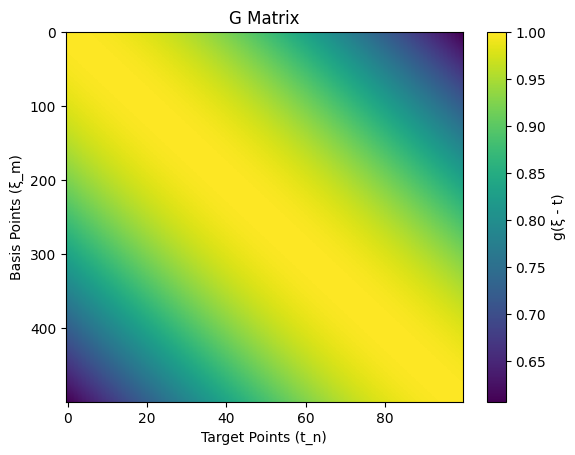

In [7]:
plt.imshow(G, cmap='viridis', aspect='auto')
plt.colorbar(label="g(ξ - t)")
plt.title("G Matrix")
plt.xlabel("Target Points (t_n)")
plt.ylabel("Basis Points (ξ_m)")
plt.show()
